# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image  

import random

In [61]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

In [90]:
df= pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [16]:
df.shape

(1000, 3)

In [17]:
df.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

In [18]:
df.describe()

,Creditability,CreditAmount,DurationOfCreditInMonths
count,1000.000000,1000.000000,1000.000000
mean,0.700000,3271.248000,20.903000
std,0.458487,2822.751760,12.058814
min,0.000000,250.000000,4.000000
25%,0.000000,1365.500000,12.000000
50%,1.000000,2319.500000,18.000000
75%,1.000000,3972.250000,24.000000
max,1.000000,18424.000000,72.000000


# 3. Plot Histogram for column 'CreditAmount'

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

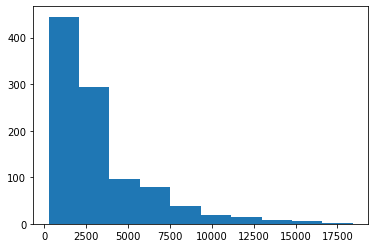

In [19]:
plt.hist(x=df['CreditAmount'])

# 3b. Create creditability dataframe

(array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

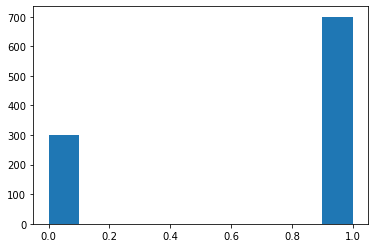

In [20]:
plt.hist(x=df['Creditability'])

In [44]:
df_cred=pd.DataFrame(df['Creditability'])
df_cred.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


In [45]:
#df_cred.drop(['CreditAmount','DurationOfCreditInMonths'],axis=1)

In [46]:
df_cred.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [51]:
df_cred=pd.get_dummies(df, columns=['Creditability'])
df_cred.head()

,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1049,18,0,1
1,2799,9,0,1
2,841,12,0,1
3,2122,12,0,1
4,2171,12,0,1


In [49]:
df_cred.head()

,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1049,18,0,1
1,2799,9,0,1
2,841,12,0,1
3,2122,12,0,1
4,2171,12,0,1


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

(array([700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

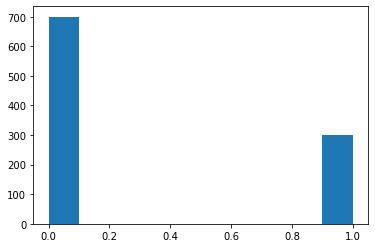

In [54]:
plt.hist(x=df_cred['Creditability_0'])

(array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

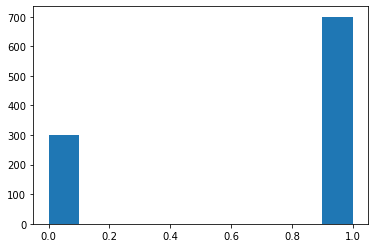

In [55]:
plt.hist(x=df_cred['Creditability_1'])

# 6. Prepare input data for the model

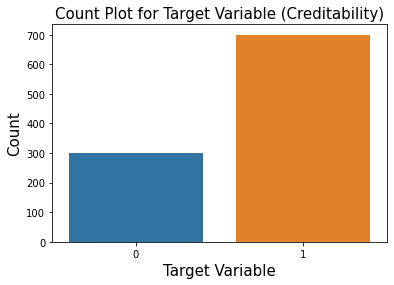

In [95]:

df_target = df['Creditability']
df_target.value_counts()

sns.countplot(x = df_target)


plt.title('Count Plot for Target Variable (Creditability)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# 7. Fit logistic regression model

In [97]:
X = pd.get_dummies(df, drop_first=True)

# consider the dependent variable
y = df.Creditability

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [103]:
model=sm.Logit(y_train, X_train)
result = model.fit(method='bfgs')
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:                   1.000
Time:                        18:46:04   Log-Likelihood:            -3.0909e-06
converged:                      False   LL-Null:                       -492.03
Covariance Type:            nonrobust   LLR p-value:                2.055e-214
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Creditability              159.7950   6892.701  

C:\Users\rathn\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 8. Test accuracy calculation

In [104]:
from sklearn.metrics import accuracy_score

In [108]:
X = pd.get_dummies(df, drop_first=True)

# consider the dependent variable
y = df.Creditability

In [109]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [110]:
logreg_full = sm.Logit(y_train_full, X_train_full).fit()

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_full = logreg_full.predict(X_test_full)

# print the summary of the model
print(logreg_full.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:                   1.000
Time:                        18:50:32   Log-Likelihood:            -2.6430e-07
converged:                      False   LL-Null:                       -492.03
Covariance Type:            nonrobust   LLR p-value:                2.055e-214
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Creditability              185.1758   2.14e+04      0.009      0.993   -4.17e+04    4.21e+04
CreditAmount           

C:\Users\rathn\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
print(logreg_full.summary())

                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:                   1.000
Time:                        18:50:53   Log-Likelihood:            -2.6430e-07
converged:                      False   LL-Null:                       -492.03
Covariance Type:            nonrobust   LLR p-value:                2.055e-214
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Creditability              185.1758   2.14e+04      0.009      0.993   -4.17e+04    4.21e+04
CreditAmount                -0.0005      1.805     -0.000      1.000      -3.538       3.

In [112]:
y_pred_prob = logreg_full.predict(X_test_full)

y_pred =  [ 0 if x < 0.5 else 1 for x in y_pred_prob]

cm = confusion_matrix(y_test_full, y_pred)

TN = cm[0,0]

TP = cm[1,1]

FP = cm[0,1]

FN = cm[1,0]

accuracy = (TN+TP) / (TN+FP+FN+TP)

print("Accuracy:", accuracy)

Accuracy: 1.0


# 9. Build a confusion matrix

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [119]:
decision_tree_full = DecisionTreeClassifier(random_state=10)

# fit the model using fit() on train data
decision_tree_full = decision_tree_full.fit(X_train, y_train)

# predict the attrition for test set
y_pred_full = decision_tree_full.predict(X_test)

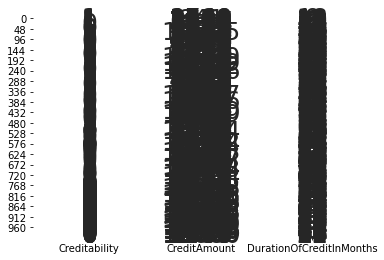

In [120]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_full)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = df)

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

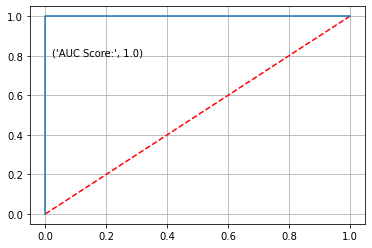

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_full)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)